In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
url = '/Users/wanghaojie/Downloads/compustat.zip'
data = pd.read_csv(url)

In [3]:
var = ['sic', 'datacqtr', 'cusip', 'cshoq', 'saleq', 'prccq']
data = data[var]
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


In [4]:
data['market cap'] = data['cshoq'] * data['prccq']
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,market cap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN


In [5]:
var2 = ['saleq','market cap']
data1 = data[ ['sic'] + var2 ]

In [6]:
print("Time series mean\n")

ts_mean = []
for variable in var2:
    v_mean = data1[variable].groupby(data1['sic']).mean()
    ts_mean.append(v_mean)
    
ts_mean = pd.DataFrame(ts_mean).T

new_name = [ var + '_mean' for var in var2]
ts_mean.rename(columns = dict(zip( var2, new_name)), inplace=True )

ts_mean

Time series mean



,saleq_mean,market cap_mean
sic,,
100.0,222.266152,1206.085023
200.0,33.848893,179.306277
700.0,82.575097,461.605149
800.0,18.531667,216.377473
900.0,10.874631,20.454987
...,...,...
8744.0,55.911086,146.579942
8900.0,1.911976,35.620137
9995.0,37.455228,253.593316


In [7]:
print("Time series standard deviation")

ts_std = []
for variable in var2:
    v_std = data1[variable].groupby(data1['sic']).std()
    ts_std.append(v_std)
    
ts_std = pd.DataFrame(ts_std).T

new_name = [ var + '_std' for var in var2]
ts_std.rename(columns = dict(zip( var2, new_name)), inplace=True )

ts_std

Time series standard deviation


,saleq_std,market cap_std
sic,,
100.0,598.684467,6245.526308
200.0,82.732609,497.197095
700.0,143.351359,1021.460138
800.0,25.453303,331.978623
900.0,6.172313,8.527221
...,...,...
8744.0,110.992902,399.932758
8900.0,3.136163,31.784375
9995.0,262.097775,3936.877699


In [8]:
print("Time Series count of missing values")

ts_misscount = []
tmp = data1.copy()
for variable in var2:
    tmp[variable] = tmp[variable].isnull()
    v_misscount = tmp[variable].groupby(data1['sic']).sum()
    ts_misscount.append(v_misscount)
    
ts_misscount = pd.DataFrame(ts_misscount).T

new_name = [ var + '_misscount' for var in var2]
ts_misscount.rename(columns = dict(zip( var2, new_name)), inplace=True )

ts_misscount

Time Series count of missing values


,saleq_misscount,market cap_misscount
sic,,
100.0,323.0,706.0
200.0,49.0,284.0
700.0,30.0,330.0
800.0,104.0,256.0
900.0,28.0,66.0
...,...,...
8744.0,16.0,128.0
8900.0,4.0,17.0
9995.0,2397.0,6506.0


In [9]:
print("Time Series ratio of missing values")

tmp2 = data1['sic'].value_counts()

ts_missratio = ts_misscount.div(tmp2, axis=0)

new_name2 = [ var + '_missratio' for var in var2]
ts_missratio.rename(columns = dict(zip( new_name, new_name2)), inplace=True )

ts_missratio

Time Series ratio of missing values


,saleq_missratio,market cap_missratio
100.0,0.092656,0.202524
200.0,0.058683,0.340120
700.0,0.036946,0.406404
800.0,0.148148,0.364672
900.0,0.201439,0.474820
...,...,...
8744.0,0.028021,0.224168
8900.0,0.086957,0.369565
9995.0,0.096739,0.262572
9997.0,0.108974,0.265152


In [10]:
print("Aggregate the result in a dataframe")

agg_result = pd.concat( [ts_mean, ts_std, ts_misscount, ts_missratio], axis=1 )
agg_result

Aggregate the result in a dataframe


,saleq_mean,market cap_mean,saleq_std,market cap_std,saleq_misscount,market cap_misscount,saleq_missratio,market cap_missratio
100.0,222.266152,1206.085023,598.684467,6245.526308,323.0,706.0,0.092656,0.202524
200.0,33.848893,179.306277,82.732609,497.197095,49.0,284.0,0.058683,0.340120
700.0,82.575097,461.605149,143.351359,1021.460138,30.0,330.0,0.036946,0.406404
800.0,18.531667,216.377473,25.453303,331.978623,104.0,256.0,0.148148,0.364672
900.0,10.874631,20.454987,6.172313,8.527221,28.0,66.0,0.201439,0.474820
...,...,...,...,...,...,...,...,...
8744.0,55.911086,146.579942,110.992902,399.932758,16.0,128.0,0.028021,0.224168
8900.0,1.911976,35.620137,3.136163,31.784375,4.0,17.0,0.086957,0.369565
9995.0,37.455228,253.593316,262.097775,3936.877699,2397.0,6506.0,0.096739,0.262572
9997.0,8703.366907,54112.717512,12925.760163,97658.977606,187.0,455.0,0.108974,0.265152


# Q: Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?

In [11]:
print('I will do the following analysis.\n')

for v in var2:
    print('For '+v)
    print(data1[v].groupby(data1['sic']).describe())
    print('\n')

I will do the following analysis.

For saleq
          count         mean           std       min        25%        50%  \
sic                                                                          
100.0    3163.0   222.266152    598.684467    -0.016    2.05150    11.6780   
200.0     786.0    33.848893     82.732609    -0.139    0.32850     2.0935   
700.0     782.0    82.575097    143.351359     0.000    1.22475    12.6515   
800.0     598.0    18.531667     25.453303    -7.800    0.56250     8.1620   
900.0     111.0    10.874631      6.172313     0.000    7.95500    10.9050   
...         ...          ...           ...       ...        ...        ...   
8744.0    555.0    55.911086    110.992902     0.000    7.07400    23.3580   
8900.0     42.0     1.911976      3.136163     0.000    0.08275     0.3300   
9995.0  22381.0    37.455228    262.097775   -17.892    0.00000     0.1340   
9997.0   1529.0  8703.366907  12925.760163 -9010.000  328.75200  2174.8000   
9998.0     51.0    

# Do you find some outliers? Could you think why?

In [12]:
print('For market cap, I found that the maximum value is much greater than 70% quantile.')
print('And I think it is because some market earthquakes happened at that time.')

For market cap, I found that the maximum value is much greater than 70% quantile.
And I think it is because some market earthquakes happened at that time.


In [13]:
data2 = data[ ['sic', 'datacqtr', 'market cap'] ]
data2.head()

,sic,datacqtr,market cap
0,3089.0,1966Q1,NaN
1,3089.0,1966Q2,NaN
2,3089.0,1966Q3,NaN
3,3089.0,1966Q4,NaN
4,3089.0,1967Q1,NaN


In [43]:
data2nna=data2.dropna(axis=0,how='any').copy()
marketcap=data2nna['market cap'].groupby([data2nna['datacqtr'],data2nna['sic'] ]).mean().unstack()

I plot the market caps of 10 companies, and found that markets caps of these companies attain their highest values around 2008


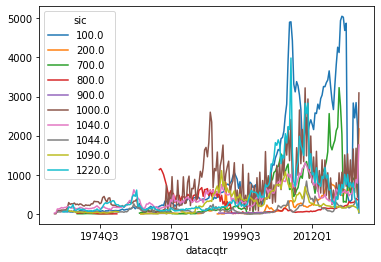

In [50]:
import matplotlib.pyplot as plt
marketcap.iloc[:, :10].plot()
print('I plot the market caps of 10 companies, and found that markets caps of these companies attain their highest values around 2008')

In [51]:
newsic = np.array(data2nna['sic']) /100
newsic = np.trunc(newsic)
data2nna['sic2'] = newsic
data2nna

,sic,datacqtr,market cap,sic2
18,3089.0,1970Q3,26.202500,30.0
19,3089.0,1970Q4,24.460000,30.0
20,3089.0,1971Q1,34.193250,30.0
21,3089.0,1971Q2,29.023500,30.0
22,3089.0,1971Q3,16.256875,30.0
...,...,...,...,...
1811284,2836.0,2020Q1,65.485200,28.0
1811286,2836.0,2019Q2,39.935590,28.0
1811287,2836.0,2019Q3,36.755800,28.0
1811288,2836.0,2019Q4,32.249750,28.0


In [74]:
industrysum = data2nna['market cap'].groupby([data2nna['datacqtr'],data2nna['sic2'] ]).sum()
industrysum = pd.DataFrame(industrysum).reset_index().rename(columns={'market cap': 'total'})
industrysum

,datacqtr,sic2,total
0,1962Q1,45.0,56.848000
1,1962Q1,60.0,13222.092238
2,1962Q2,40.0,537.735850
3,1962Q2,45.0,56.950000
4,1962Q2,60.0,10331.887282
...,...,...,...
14733,2020Q2,79.0,35416.289340
14734,2020Q2,80.0,48128.266464
14735,2020Q2,82.0,1176.651750
14736,2020Q2,87.0,191171.296600


In [80]:
newdata = pd.merge(data2nna, industrysum, on= ['datacqtr','sic2'])
newdata['ratio2'] = ( newdata['market cap'] / newdata['total'] * 100 ) **2
newdata

,sic,datacqtr,market cap,sic2,total,ratio2
0,3089.0,1970Q3,26.20250,30.0,6289.293375,0.173573
1,3089.0,1970Q3,37.07050,30.0,6289.293375,0.347419
2,3060.0,1970Q3,30.90450,30.0,6289.293375,0.241457
3,3060.0,1970Q3,20.08825,30.0,6289.293375,0.102019
4,3011.0,1970Q3,8.57475,30.0,6289.293375,0.018588
...,...,...,...,...,...,...
1341701,900.0,2004Q4,10.45058,9.0,10.450580,10000.000000
1341702,900.0,2005Q2,14.13902,9.0,14.139020,10000.000000
1341703,900.0,2005Q4,17.78355,9.0,17.783550,10000.000000
1341704,900.0,2006Q2,21.52225,9.0,21.522250,10000.000000


In [81]:
industrysum2_raw = newdata['ratio2'].groupby([newdata['datacqtr'],newdata['sic2'] ]).sum()
industrysum2 = pd.DataFrame(industrysum2_raw).reset_index().rename(columns={'ratio2': 'total2'})
industrysum2

,datacqtr,sic2,total2
0,1962Q1,45.0,10000.000000
1,1962Q1,60.0,564.058299
2,1962Q2,40.0,3013.961261
3,1962Q2,45.0,10000.000000
4,1962Q2,60.0,543.295514
...,...,...,...
14733,2020Q2,79.0,9653.938125
14734,2020Q2,80.0,5642.346865
14735,2020Q2,82.0,6241.410202
14736,2020Q2,87.0,4905.908953


In [94]:
industrysum3_raw = industrysum2['total2'].groupby(industrysum2['sic2']).mean()
industrysum3 = pd.DataFrame(industrysum3_raw).rename(columns={'total2': 'mean'})
highest = industrysum3.sort_values(by='mean').index[-4:]
highest

Float64Index([9.0, 81.0, 86.0, 89.0], dtype='float64', name='sic2')

In [116]:
highest_industry = industrysum2.set_index('sic2').loc[highest,:]
highest_industry = highest_industry.reset_index().pivot('datacqtr','sic2')
highest_industry

total2                        
sic2         9.0           81.0 86.0 89.0
datacqtr                                 
1982Q2    10000.0           NaN  NaN  NaN
1982Q3    10000.0           NaN  NaN  NaN
1982Q4    10000.0           NaN  NaN  NaN
1983Q1    10000.0           NaN  NaN  NaN
1983Q2    10000.0           NaN  NaN  NaN
...           ...           ...  ...  ...
2019Q1        NaN  10000.000000  NaN  NaN
2019Q2        NaN   9704.936241  NaN  NaN
2019Q3        NaN  10000.000000  NaN  NaN
2019Q4        NaN   9581.071999  NaN  NaN
2020Q1        NaN  10000.000000  NaN  NaN

[130 rows x 4 columns]

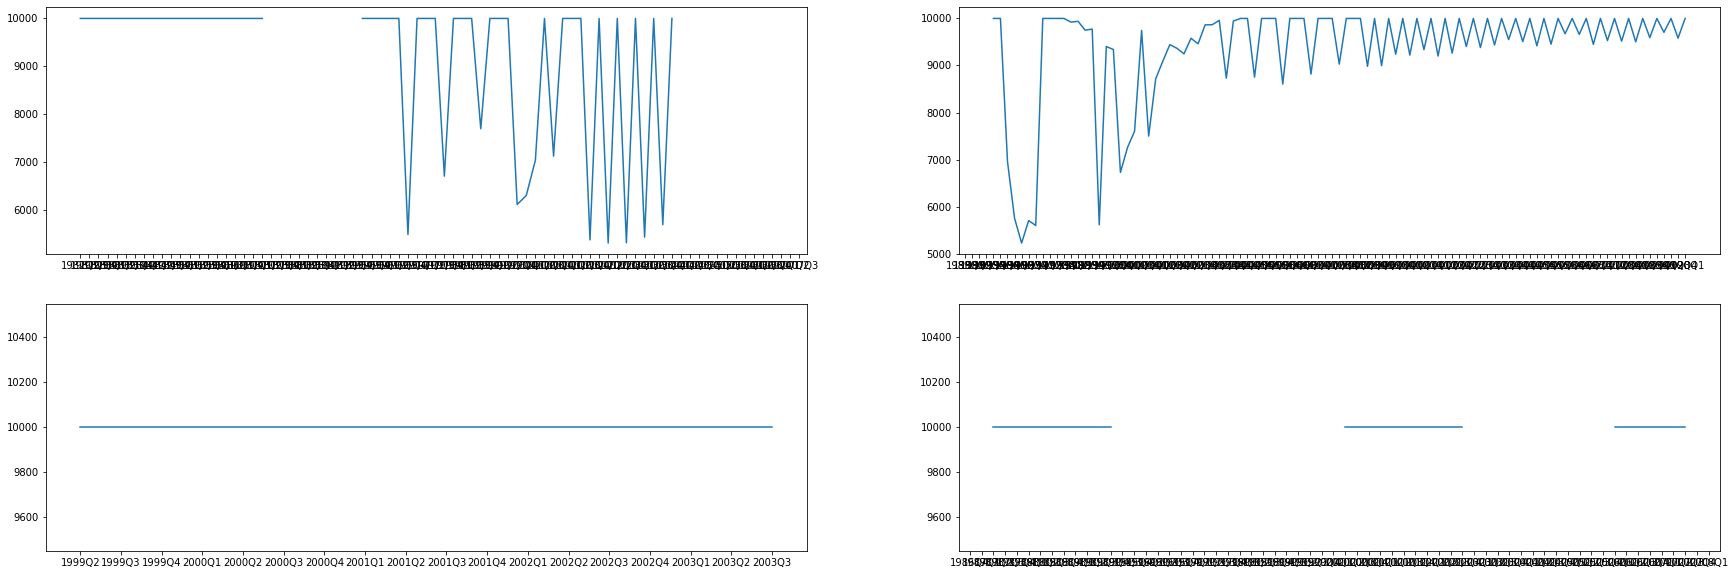

In [122]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.plot(highest_industry.index, highest_industry.iloc[:,0])
ax2.plot(highest_industry.index, highest_industry.iloc[:,1])
ax3.plot(highest_industry.index, highest_industry.iloc[:,2])
ax4.plot(highest_industry.index, highest_industry.iloc[:,3])